<a href="https://colab.research.google.com/github/maqamylee0/CSCI410-lab/blob/master/Lab1/CSCI410_lab1_Linear_Regression_part_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center">
  <td align="center"><a target="_blank" href="https://edu.epfl.ch/coursebook/en/fundamentals-in-statistical-pattern-recognition-EE-612">
        <img src="https://www.idiap.ch/en/about/files/idiap-logo-e-bleu-noir-pantone.png" style="padding-bottom:5px;" width="100" height="30"/>
      Visit the EPFL course page</a></td>
  <td align="center"><a target="_blank" href="https://www.usal.edu.lb/">
        <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTxzelk0TseYtdpMaTooDotsxARzYBB_ukJU9KAccb1tST55RDdd_4CLETiNG_qk3fDSRM&usqp=CAU" style="padding-bottom:5px;" width="75" height="75"/>
      Visit the USAL page</a></td>

  <td align="center"><a target="_blank" href="https://github.com/akomaty/CSCI410-lab.git">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>

# Copyright Information

In [193]:
#@title
# Copyright 2021 - All Rights Reserved.
# Idiap Research Institute - Ecole Polytechnique Fédérale de Lausanne EPFL
# Tiago de Freitas Pereira https://www.idiap.ch/~tpereira/
# André Anjos https://andreanjos.org/
# Sébastien Marcel https://www.idiap.ch/~marcel/professional/Welcome.html
# Ali Komaty - CSCI410-University of Sciences and Arts in Lebanon - USAL.
# © FSPR: Fundamentals in Statistical Pattern Recognition
# https://www.idiap.ch/~marcel/professional/EPFL_FSPR_2019.html
# © USAL CSCI410: Introduction to Machine Learning

# Lab 1: Univariate linear regression using an unvectorized form and gradient descent.
In this lab, you are going to implement the Univariate linear regression from scratch using an (unvectorized) form and gradient descent. Walk through the lab and read the explanation carefully. You will encounter ***TODO*** blocks, follow the instructions to fill them correctly.


## Getting started: Loading the database

First we need to import the modules that we are going to use during this lab:

In [194]:
import os
import sys
import argparse
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Now we need to load our dataset from sklearn as follows:

In [195]:
# load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y = True)
#X = datasets.load_diabetes(return_X_y = False)

In [196]:
print("The number of samples in the dataset is {}".format(len(X)))

The number of samples in the dataset is 442


In [197]:
print("The number of features is {}".format(len(X[0])))

The number of features is 10


### Understanding the database
This dataset consists of the following:
First 10 columns (**X**) are numeric predictive values:

* age age in years
* sex
* bmi body mass index
* bp average blood pressure
* s1 tc, total serum cholesterol
* s2 ldl, low-density lipoproteins
* s3 hdl, high-density lipoproteins
* s4 tch, total cholesterol / HDL
* s5 ltg, possibly log of serum triglycerides level
* s6 glu, blood sugar level

Column 11 (**y**) is a quantitative measure of disease progression one year after baseline

In [198]:
print(X[:5])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]


Let's plot the Disease progression versus the BMI.


Text(0, 0.5, 'Disease Progression')

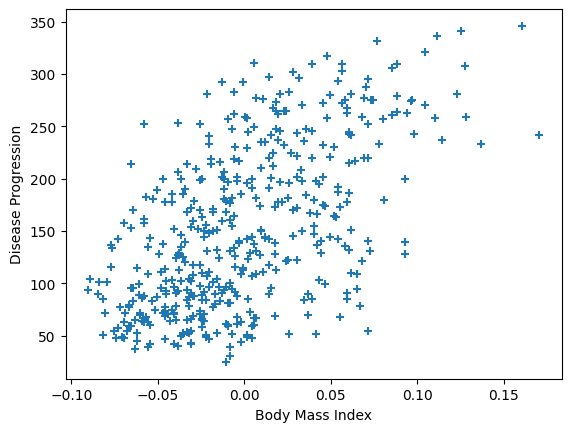

In [199]:
plt.scatter(X[:,np.newaxis, 2], y, marker='+')
plt.xlabel("Body Mass Index")
plt.ylabel("Disease Progression")

### Splitting the database into training and testing sets

Let's now split the data into training/testing sets. We want to take 50 samples for the test test, and the rest will go to the training set.
Hint: You can use ``X[a:b]`` to split the data

In [200]:
# Split the data: X
X_train = X[:392] # TODO: Split the data and put 392 samples in the training set
X_test = X[392:] # TODO: Split the data and put 50 samples in the test set

# Split the target: y
y_train = y[:392] # TODO: Split the data and put 392 samples in the training set
y_test = y[392:] # TODO: Split the data and put 50 samples in the test set

print("The size of the training data is {}".format(len(X_train)))
print("The size of the test data is {}".format(len(X_test)))

The size of the training data is 392
The size of the test data is 50


In [201]:
print(X_train)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [-0.00551455  0.05068012  0.00133873 ... -0.03949338 -0.04117617
  -0.08806194]
 [ 0.0090156   0.05068012  0.06924089 ...  0.03430886  0.10329702
   0.07348023]
 [-0.02367725 -0.04464164 -0.06979687 ... -0.03949338 -0.08913335
  -0.05078298]]


Let's choose the BMI feature, we will only work on this feature for now.
Hint: You can use ``X[:, a]`` to select the wanted feature

In [202]:
X_train = X_train[:, 1] # TODO: Select only the second feature
X_test = X_test[:, 1] # TODO: Select only the second feature

In [203]:
print(X_train)

[ 0.05068012 -0.04464164  0.05068012 -0.04464164 -0.04464164 -0.04464164
  0.05068012  0.05068012  0.05068012 -0.04464164 -0.04464164  0.05068012
 -0.04464164  0.05068012 -0.04464164  0.05068012 -0.04464164  0.05068012
 -0.04464164 -0.04464164 -0.04464164  0.05068012 -0.04464164  0.05068012
 -0.04464164  0.05068012 -0.04464164 -0.04464164 -0.04464164  0.05068012
 -0.04464164 -0.04464164  0.05068012 -0.04464164 -0.04464164  0.05068012
 -0.04464164 -0.04464164  0.05068012  0.05068012  0.05068012 -0.04464164
  0.05068012 -0.04464164  0.05068012  0.05068012 -0.04464164 -0.04464164
  0.05068012  0.05068012 -0.04464164  0.05068012 -0.04464164 -0.04464164
 -0.04464164 -0.04464164 -0.04464164 -0.04464164 -0.04464164  0.05068012
 -0.04464164  0.05068012  0.05068012 -0.04464164  0.05068012  0.05068012
  0.05068012  0.05068012  0.05068012 -0.04464164 -0.04464164 -0.04464164
  0.05068012  0.05068012  0.05068012  0.05068012  0.05068012 -0.04464164
 -0.04464164 -0.04464164 -0.04464164  0.05068012 -0

## Start implementing the functions
In this section, we are going to implement the functions to build our linear regression model from scratch.

### The hypothesis function $h_\theta(x)$
We are going to implement a function that calculates the hypothesis $h$ given the set of parameters $\theta4 and a single $x$.

The univariate linear hypothesis :$h_\theta(x)$ is defined as:

$h_\theta(x) = \theta_0 + \theta_1 x$
  
The parameters are:

* **X**: A vector (, list or tuple) containing all observations for the input variable
* **theta**: A vector (,list or tuple) with two positions with the values of $\theta_0$ and $\theta_1$, in this order.

The function returns the estimated value for y (1 float number).

  

**Hint**:  Use ``theta[0]`` to access $\theta_0$

In [204]:
def h(x, theta):
  # TODO: implement the function that returns h, given x and theta.
  h = theta[0] + (theta[1]*x)
  return h

In [205]:
h(1.0, [0.5, 0.5])

1.0


### The cost $J$
Now we are going to implement the (unvectorized) cost $J$ for the univariate linear regression model given X, y and $\theta$.
  The cost for the linear regression model is defined as:
  
  $J(\theta_0, \theta_1) = \frac{1}{2n}\sum_{i=0}^{n-1} \Big(h_\theta(x^{(i)}) - y^{(i)}\Big)^2$

The parameters are:


*   **X**: A vector (, list or tuple) containing all observations for the input variable
*   **y**: A vector (, list or tuple) containing all expected values for the output variable
*  **theta**: A vector (,list or tuple) with two positions with the values of $\theta_0$ and $\theta_1$, in this order.

The function returns the cost for the current input set given the (linear) model.




In [206]:
def J(X, y, theta):
  J_ = 0.
  n = len(X)
  for i in range(n):
    # TODO: replace the following two lines with your solution following the formula given above.
    J_ += (h(X[i], theta) - y[i])**2
    e_ = 0.
    J_ += e_
  J_ /= (2*n)
  return J_


### The first partial derivative of the cost function $\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$

We will now compute the partial derivative of the cost function with respect to $\theta_0$.

As derived in the course, this partial derivative is:

$\frac{\partial}{\partial \theta_0}J(\theta_0, \theta_1) = \frac{1}{n}\sum_{i=0}^{n-1} \Big(h_\theta(x^{(i)}) - y^{(i)}\Big)$
  
The function parameters are:


*   **X**: A vector (, list or tuple) containing all observations for the input variable.
*   **y**: A vector (, list or tuple) containing all expected values for the output variable.
* theta A vector (,list or tuple) with two positions with the values of $\theta_0$ and $\theta_1$, in this order.

  The function returns the cost for the current input set given the (linear) model.

In [207]:
def dJ0(X, y, theta):
  dJ0_ = 0
  n = len(X)
  for i in range(n):
    # TODO: Replace the following line with your solution
    dJ0_ += h(X[i], theta) - y[i]
    dJ0_ += 0.
  dJ0_ /= n
  return dJ0_

### The second partial derivative of the cost function $\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$

We will now compute the partial derivative of the cost function with respect to $\theta_1$.

As derived in the course, this partial derivative is:

$\frac{\partial}{\partial \theta_1}J(\theta_0, \theta_1) = \frac{1}{n}\sum_{i=0}^{n-1} \Big(h_\theta(x^{(i)}) - y^{(i)}\Big)x^{(i)}$
  
The function parameters are:


*   **X**: A vector (, list or tuple) containing all observations for the input variable.
*   **y**: A vector (, list or tuple) containing all expected values for the output variable.
* theta A vector (,list or tuple) with two positions with the values of $\theta_0$ and $\theta_1$, in this order.

  The function returns the cost for the current input set given the (linear) model.

In [208]:
def dJ1(X, y, theta):
  dJ1_ = 0
  n = len(X)
  for i in range(n):
    # TODO: Replace the following line with your solution
    dJ1_ += (h(X[i], theta) - y[i])*X[i]
    dJ1_ += 0.
  dJ1_ /= n
  return dJ1_

## Running the algorithm
In this section, we are going to initialize our parameters, then run the experiment.

### Initializing the paramaters

Initialise the parameters using the zeros matrix from numpy.
Note that initialising the parameters have a huge impact of the performance of your algorithm. For example, a small learning rate may not help the system learn at all, while a big learning rate may result in the divergence of the algorithm.

The number of itrations is also important, we may increase the number of iterations to get better results, but we have to pay attention not to overfit our model.

In [209]:
# initial parameters
theta = np.zeros((2,), dtype='float64')
# Define the maximum number of iterations, you may have to tweak the number of iterations.
max_iter = 20
# Define the learning rate, make sure to fine tune this parameter as you test your algorithm.
alpha = 0.01

Let's do some testing for the hypothesis:

In [210]:

print("Your h() function should return 1.0 =>", h(1.0, [0.5, 0.5]))
print("Your h() function should return 1.5 =>", h(2.0, [0.5, 0.5]))
print("Your h() function should return 2.0 =>", h(3.0, [0.5, 0.5]))

Jtrain = np.ndarray(max_iter+1)
Jtest = np.ndarray(max_iter+1)

Jtrain[0]= J(X_train, y_train, theta)
Jtest[0] = J(X_test, y_test, theta)
print('%03d/%03d: J_train = %.8e | J_devel = %8e' % (0, max_iter, Jtrain[0], Jtest[0]))

Your h() function should return 1.0 => 1.0
Your h() function should return 1.5 => 1.5
Your h() function should return 2.0 => 2.0
000/020: J_train = 1.45238431e+04 | J_devel = 1.464228e+04


In [213]:
print(Jtrain)

[14523.84311224 14293.84152111 14068.41696192 13847.47835164
 13630.93641978 13418.70367235 13210.69435646 13006.82442574
 12807.01150634 12611.17486362 12419.2353696  12231.11547092
 12046.73915756 11866.03193207 11688.92077953 11515.334138
 11345.20186963 11178.45523233 11015.02685194 10854.85069509
 10697.86204245]


In [211]:
for t in range(max_iter):
  # compute the partial derivatives (gradient)
  dJ = [dJ0(X_train, y_train, theta), dJ1(X_train, y_train, theta)]
  # update the parameters
  theta -= np.array(dJ) * alpha

  # compute the cost given the new parameters
  Jtrain[t+1] = J(X_train, y_train, theta)
  Jtest[t+1] = J(X_test, y_test, theta)
  print('%03d/%03d: J_train = %.8e | J_test = %8e' % (t+1, max_iter, Jtrain[t+1], Jtest[t+1]))

  # check for convergence: end-of-accuracy criteria on the train set
  e_ = abs(Jtrain[t] - Jtrain[t+1])
  if(e_ < 1e-08):
    print("Convergence detected (delta J = %.5e). Stopping at iteration %d..." % (abs(Jtrain[t] - Jtrain[t+1]), t+1))
    break

print('Result (after %d iterations):' % (t+1))
#theta[0] = theta[0] - (theta[1]*X_mean)/X_std
#theta[1] /= X_std
print('Final parameters (theta): %s' % theta)

001/020: J_train = 1.42938415e+04 | J_test = 1.441100e+04
002/020: J_train = 1.40684170e+04 | J_test = 1.418432e+04
003/020: J_train = 1.38474784e+04 | J_test = 1.396213e+04
004/020: J_train = 1.36309364e+04 | J_test = 1.374435e+04
005/020: J_train = 1.34187037e+04 | J_test = 1.353089e+04
006/020: J_train = 1.32106944e+04 | J_test = 1.332167e+04
007/020: J_train = 1.30068244e+04 | J_test = 1.311660e+04
008/020: J_train = 1.28070115e+04 | J_test = 1.291560e+04
009/020: J_train = 1.26111749e+04 | J_test = 1.271858e+04
010/020: J_train = 1.24192354e+04 | J_test = 1.252548e+04
011/020: J_train = 1.22311155e+04 | J_test = 1.233620e+04
012/020: J_train = 1.20467392e+04 | J_test = 1.215068e+04
013/020: J_train = 1.18660319e+04 | J_test = 1.196885e+04
014/020: J_train = 1.16889208e+04 | J_test = 1.179062e+04
015/020: J_train = 1.15153341e+04 | J_test = 1.161592e+04
016/020: J_train = 1.13452019e+04 | J_test = 1.144469e+04
017/020: J_train = 1.11784552e+04 | J_test = 1.127686e+04
018/020: J_tra

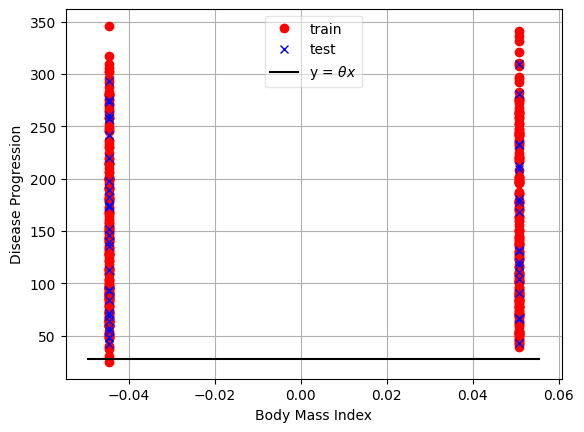

In [212]:
plt.plot(X_train, y_train, 'ro', label="train")
plt.plot(X_test, y_test, 'bx', label="test")

[x_min, x_max, y_min, y_max] = plt.axis()
x = np.arange(x_min, x_max, (x_max-x_min)/200)
y = [h(k, theta) for k in x]
plt.plot(x, y, "k-", label=r"y = $\theta x$")
plt.xlabel("Body Mass Index")
plt.ylabel("Disease Progression")
leg = plt.legend(loc='best')
leg.get_frame().set_alpha(0.5)
plt.grid()
plt.show()